# 머신러닝

#### 1. 데이터 수집 (완료), 크롤링

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
titanic = sns.load_dataset('titanic')

#### 2. 데이터 전처리, 탐색적 데이터 분석

In [10]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [11]:
titanic.shape

(891, 15)

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [13]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [15]:
# pclass, who, adult_male, embark_town, alive, alone 삭제 후 df에 저장

In [16]:
df = titanic.drop(['class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'], axis=1)

In [17]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot:>

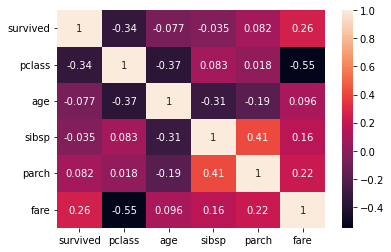

In [18]:
sns.heatmap(df.corr(), annot=True) # annot=True : 숫자 표시

<AxesSubplot:>

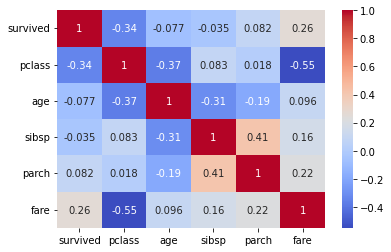

In [19]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [20]:
df.value_counts('pclass')

pclass
3    491
1    216
2    184
dtype: int64

C:\Users\yng12\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='count'>

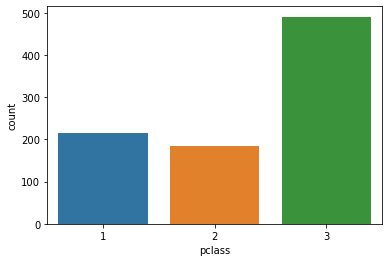

In [21]:
sns.countplot('pclass', data=df)

In [22]:
pd.crosstab(df.pclass, df.survived, margins=True)

survived,0,1,All
pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


C:\Users\yng12\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='count'>

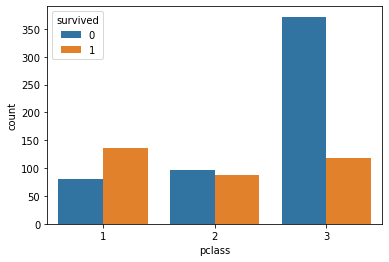

In [23]:
sns.countplot('pclass', hue='survived', data=df)

C:\Users\yng12\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

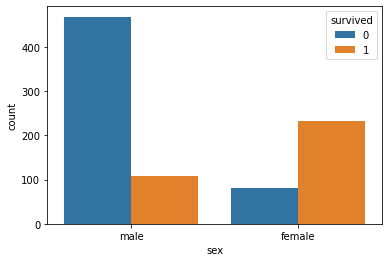

In [24]:
sns.countplot('sex', hue='survived', data=df)

C:\Users\yng12\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='age'>

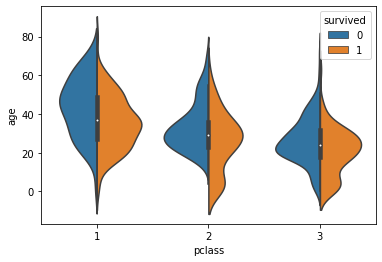

In [25]:
sns.violinplot('pclass', 'age', hue='survived', data=df, split=True)

C:\Users\yng12\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='pclass'>

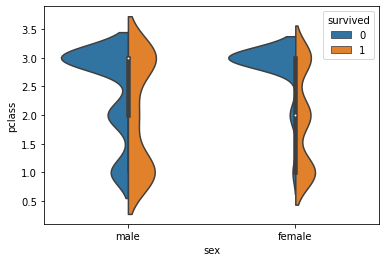

In [26]:
sns.violinplot('sex','pclass', hue='survived', data=df, split=True)

### * 전처리

### 1. 결측치 제거

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   pclass    891 non-null    int64   
 2   sex       891 non-null    object  
 3   age       714 non-null    float64 
 4   sibsp     891 non-null    int64   
 5   parch     891 non-null    int64   
 6   fare      891 non-null    float64 
 7   embarked  889 non-null    object  
 8   deck      203 non-null    category
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 57.0+ KB


In [28]:
df.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
deck        688
dtype: int64

In [29]:
df.embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

#### 1. 제일 수치가 높은 S항으로 대체 --> df1
#### 2. N항으로 대체 --> df2

In [30]:
df1 = df[:]
df2 = df[:]

In [31]:
df1['embarked'].fillna('S', inplace=True)
df2['embarked'].fillna('N', inplace=True)

C:\Users\yng12\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [32]:
df1.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      0
deck        688
dtype: int64

In [33]:
df1.embarked.value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [34]:
df2.embarked.value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [35]:
df1.age.fillna(df1.age.median, inplace=True)

In [36]:
titanic = sns.load_dataset('titanic')
titanic1 = sns.load_dataset('titanic')

df = titanic.drop(['class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'], axis=1)
df1 = titanic1.drop(['class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'], axis=1)

df['embarked'].fillna('S', inplace=True)
df1['embarked'].fillna('N', inplace=True)

In [37]:
# 1등석, 남성의 중앙 나이 --> 해당 조건의 결측치에 채워넣기
# 1등석, 여성의 중앙 나이
# 2등석, 남성의 중앙 나이
# 2등석, 여성의 중앙 나이
# 3등석, 남성의 중앙 나이
# 3등석, 여성의 중앙 나이

In [38]:
m1 = df[(df.pclass == 1) & (df.sex == 'male')].age.median()
f1 = df[(df.pclass == 1) & (df.sex == 'female')].age.median()
m2 = df[(df.pclass == 2) & (df.sex == 'male')].age.median()
f2 = df[(df.pclass == 2) & (df.sex == 'female')].age.median()
m3 = df[(df.pclass == 3) & (df.sex == 'male')].age.median()
f3 = df[(df.pclass == 3) & (df.sex == 'female')].age.median()

In [39]:
result = pd.pivot_table(df, index=df.pclass, columns=df.sex, aggfunc='median')

In [40]:
result['age'].loc[1, ['male']]

sex
male    40.0
Name: 1, dtype: float64

In [41]:
df.loc[(df.pclass == 1) & (df.sex == 'male') & (df.age.isnull()), 'age'] = m1
df.loc[(df.pclass == 1) & (df.sex == 'female') & (df.age.isnull()), 'age'] = f1
df.loc[(df.pclass == 2) & (df.sex == 'male') & (df.age.isnull()), 'age'] = m2
df.loc[(df.pclass == 2) & (df.sex == 'female') & (df.age.isnull()), 'age'] = f2
df.loc[(df.pclass == 3) & (df.sex == 'male') & (df.age.isnull()), 'age'] = m3
df.loc[(df.pclass == 3) & (df.sex == 'female') & (df.age.isnull()), 'age'] = f3

<AxesSubplot:>

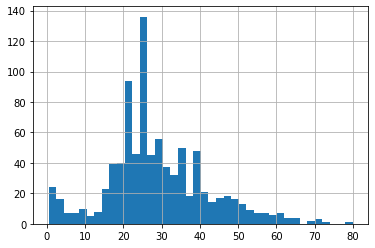

In [42]:
df.age.hist(bins=40)

In [43]:
df.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
deck        688
dtype: int64

In [44]:
df.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [45]:
df.drop(columns='deck', inplace=True)

In [46]:
df1.deck = df1.deck.astype('object').fillna('N')

In [47]:
df.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [48]:
j = 0
for i in df.sex.unique():
    df.loc[df.sex=='i', 'sex'] = j
    j += 1

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
encoder = LabelEncoder()
encoder.fit(df.sex)
labels = encoder.transform(df.sex)
print(labels)

[1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1
 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1
 1 1 0 1 0 0 1 1 1 1 1 1 

In [51]:
encoder.classes_

array(['female', 'male'], dtype=object)

In [52]:
encoder.inverse_transform([1])

array(['male'], dtype=object)

In [53]:
# encoding 2가지 방법 (label encoding)

test = ['A', 'B', 'C', 'D', 'F']
encoder = LabelEncoder()
encoder.fit(test)
labels=encoder.transform(test)
print(labels)

[0 1 2 3 4]


In [54]:
pd.get_dummies(test)

,A,B,C,D,F
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [55]:
def standard(x):
    return (x - x.mean()) / x.std()

def normalization(x):
    return (x- x.min()) / (x.max() - x.min())

In [56]:
# df, df1 모두 레이블 인코딩
# df, df1
df1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,N
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,N
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,N
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,N
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,N
889,1,1,male,26.0,0,0,30.0000,C,C


In [57]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,21.5,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
 8   deck      891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [59]:
for i in['sex', 'embarked']: # 'deck'
    encoder = LabelEncoder()
    encoder.fit(df[i])
    df[i]=encoder.transform(df[i])

In [60]:
for i in['sex', 'embarked', 'deck']:
    encoder = LabelEncoder()
    encoder.fit(df1[i])
    df1[i]=encoder.transform(df1[i])

In [61]:
# df, df1 모두 정규화, 표준화 결과 확인
df.apply(lambda x : standard(x)).age.mean()

2.664659863255777e-16

In [62]:
df.apply(lambda x : standard(x)).age.std()

0.9999999999999994

In [63]:
df.apply(lambda x : standard(x)).describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,1.903951e-16,1.679664e-16,-1.687140e-16,2.664660e-16,1.528893e-16,-3.638441e-17,7.437622e-16,8.061889e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.888293e-01,-1.565228e+00,-1.354813e+00,-2.156608e+00,-4.742788e-01,-4.734077e-01,-6.480577e-01,-1.941213e+00
25%,-7.888293e-01,-3.691575e-01,-1.354813e+00,-5.721724e-01,-4.742788e-01,-4.734077e-01,-4.888737e-01,-6.777939e-01
50%,-7.888293e-01,8.269128e-01,7.372810e-01,-2.339390e-01,-4.742788e-01,-4.734077e-01,-3.571902e-01,5.856252e-01
75%,1.266279e+00,8.269128e-01,7.372810e-01,5.176906e-01,4.325504e-01,-4.734077e-01,-2.423274e-02,5.856252e-01
max,1.266279e+00,8.269128e-01,7.372810e-01,3.824861e+00,6.780355e+00,6.970233e+00,9.661740e+00,5.856252e-01


In [64]:
df.apply(lambda x : normalization(x)).describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.654321,0.647587,0.360548,0.065376,0.063599,0.062858,0.768238
std,0.486592,0.418036,0.477990,0.167183,0.137843,0.134343,0.096995,0.395752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.264891,0.000000,0.000000,0.015440,0.500000
50%,0.000000,1.000000,1.000000,0.321438,0.000000,0.000000,0.028213,1.000000
75%,1.000000,1.000000,1.000000,0.447097,0.125000,0.000000,0.060508,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 1.data read
#### 2.확인
#### 3.EDA
#### 4.곁측치제거, 레이블인코딩, 피처스케일링

<AxesSubplot:>

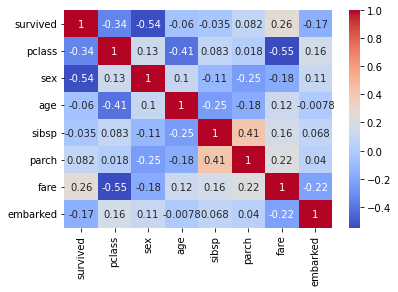

In [65]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<AxesSubplot:>

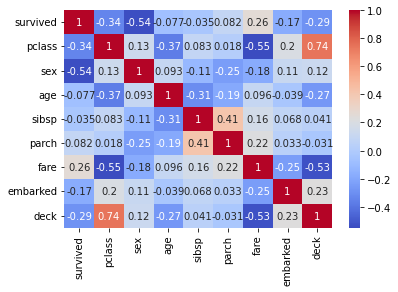

In [66]:
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')

In [67]:
# PCA, LDA, FA, ...

In [68]:
df[df.age < 6]

,survived,pclass,sex,age,sibsp,parch,fare,embarked
7,0,3,1,2.00,3,1,21.0750,2
10,1,3,0,4.00,1,1,16.7000,2
16,0,3,1,2.00,4,1,29.1250,1
43,1,2,0,3.00,1,2,41.5792,0
58,1,2,0,5.00,1,2,27.7500,2
63,0,3,1,4.00,3,2,27.9000,2
78,1,2,1,0.83,0,2,29.0000,2
119,0,3,0,2.00,4,2,31.2750,2
164,0,3,1,1.00,4,1,39.6875,2
171,0,3,1,4.00,4,1,29.1250,1


In [88]:
# 문제 데이터: 정답 데이터
y_df = df['survived']
x_df = df.drop(columns='survived')

In [89]:
y_df1 = df1['survived']
x_df1 = df1.drop(columns='survived')

In [90]:
x_df.head(1)

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,22.0,1,0,7.25,2


In [91]:
y_df.head(1)

0    0
Name: survived, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=12)

In [93]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_df1, y_df1, test_size=0.2, random_state=12)


#### 3. 머신러닝 (모델선택)
#### 4. 평가 및 적용

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [94]:
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier(n_jobs=1)
lr_clf = LogisticRegression(n_jobs=1)
dt_clf1 = DecisionTreeClassifier()
rf_clf1 = RandomForestClassifier(n_jobs=1)
lr_clf1 = LogisticRegression(n_jobs=1)

In [95]:
dt_clf.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)
lr_clf.fit(x_train, y_train)
dt_clf1.fit(x_train1, y_train1)
rf_clf1.fit(x_train1, y_train1)
lr_clf1.fit(x_train1, y_train1)

C:\Users\yng12\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').